## Homework 3: Data exploration and visualization

In this homework you will practice manipulating, exploring and visualizing data in order to answer questions about the data.

Before you begin, download this notebook, and the files "data/hw3_health_w.txt" and "data/hw3_health_m.txt" to your computer and copy them to your own repository. As we discussed in the last class, the easiest way to do that is if you clone the class repository in a separate folder on your computer with the command:

```git clone https://github.com/venpopov/DataSciencePsychUZH```

If you have already cloned previously the class repository, you can update it on your computer with the new files by "pulling" information from github via the following command, which you need to run while your terminal is in your "DataSciencePsychUZH" folder:

```git pull```



### Loading and manipulating data

The datasets `hw3_health_m.txt` and `hw3_health_w.txt` contain data for the average number of steps per day and the BMI index for a number of men and women, respectively.

First, load the two datasets via the `read.table()` command. You need to specify that the first row of the files contains the variable names, by setting the `header = TRUE` argument in the `read.table()` command **(1 point)**:

In [73]:
men <- read.table("/Users/Emma/Desktop/DataSciencePsychUZH/Homeworks/data/hw3_health_m.txt", header=TRUE)
women <- read.table("/Users/Emma/Desktop/DataSciencePsychUZH/Homeworks/data/hw3_health_w.txt", header=TRUE) #load data and assign new names
head(men) 
head(women) #look at first few lines of data
men

,ID,steps,bmi
,<int>,<int>,<dbl>
1,1,15000,16.9
2,2,15000,16.9
3,6,14861,16.8
4,7,14861,16.8
5,8,14699,17.3
6,10,14560,20.5


,ID,steps,bmi
,<int>,<int>,<dbl>
1,3,15000,17.0
2,4,14861,17.2
3,5,14861,17.2
4,9,14699,16.8
5,12,14560,20.4
6,14,14560,20.5


ID,steps,bmi
<int>,<int>,<dbl>
1,15000,16.9
2,15000,16.9
6,14861,16.8
7,14861,16.8
8,14699,17.3
10,14560,20.5
11,14560,20.6
13,14560,20.5
17,14560,20.4


Use the `str()` and `head()` commands to become familiar with the structure of the datasets **(1 point)**

In [74]:
?str()
?head()
str(men)
str(women) #get summary of data
tail(men)
tail(women) #look at last few lines of data

'data.frame':	865 obs. of  3 variables:
 $ ID   : int  1 2 6 7 8 10 11 13 17 18 ...
 $ steps: int  15000 15000 14861 14861 14699 14560 14560 14560 14560 14560 ...
 $ bmi  : num  16.9 16.9 16.8 16.8 17.3 20.5 20.6 20.5 20.4 20.4 ...
'data.frame':	921 obs. of  3 variables:
 $ ID   : int  3 4 5 9 12 14 15 16 21 23 ...
 $ steps: int  15000 14861 14861 14699 14560 14560 14560 14560 14560 14560 ...
 $ bmi  : num  17 17.2 17.2 16.8 20.4 20.5 20.5 20.5 19.7 19.6 ...


,ID,steps,bmi
,<int>,<int>,<dbl>
860,1708,764,30.4
861,1718,602,30.7
862,1735,602,27.6
863,1739,602,24.2
864,1747,463,28.9
865,1766,301,24.8


,ID,steps,bmi
,<int>,<int>,<dbl>
916,1781,162,30.4
917,1782,162,30.3
918,1783,162,30.4
919,1784,162,30.3
920,1785,162,30.3
921,1786,0,15.0


Based on the output from the `str()` command, how many men and women is there data for? **(1 point)**
There is data for 865 men and 921 women.

Based on what you learned in the previous homework, are these datasets tidy? Please explain your answer. If necessary, write code in the field below to tidy up the datasets **(2 points)**

It is not perfectly tidy because the same observational units are stored in separate tables. The same measurements are recorded in both table, the only thing that differs is the gender. Therefore, we should combine the two tables into one, and create a column that codes the gender for each measurement.

In [75]:
library(tidyverse) 
CombinedData <- bind_rows("men" = men, "women" = women, .id="gender") #combine the two tables and add the variable name "gender" 
head(CombinedData)
tail(CombinedData)
summary(CombinedData)

,gender,ID,steps,bmi
,<chr>,<int>,<int>,<dbl>
1,men,1,15000,16.9
2,men,2,15000,16.9
3,men,6,14861,16.8
4,men,7,14861,16.8
5,men,8,14699,17.3
6,men,10,14560,20.5


,gender,ID,steps,bmi
,<chr>,<int>,<int>,<dbl>
1781,women,1781,162,30.4
1782,women,1782,162,30.3
1783,women,1783,162,30.4
1784,women,1784,162,30.3
1785,women,1785,162,30.3
1786,women,1786,0,15.0


    gender                ID             steps            bmi       
 Length:1786        Min.   :   1.0   Min.   :-5602   Min.   :15.00  
 Class :character   1st Qu.: 447.2   1st Qu.: 5301   1st Qu.:20.93  
 Mode  :character   Median : 893.5   Median : 7431   Median :26.80  
                    Mean   : 893.5   Mean   : 7429   Mean   :25.29  
                    3rd Qu.:1339.8   3rd Qu.: 9699   3rd Qu.:29.30  
                    Max.   :1786.0   Max.   :15000   Max.   :32.00  

### Exploring the BMI variable

Let's try to understand our data better. Use `ggplot()` to answer the following questions:

How is the BMI distributed overall, regardless of gender? (hint: use either `geom_density()`; **2 points**) 

In [76]:
install.packages("ggplot2")
library(ggplot2)


The downloaded binary packages are in
	/var/folders/3n/g4p4960s3wx9bqgjvhfjz07c0000gn/T//Rtmpgq8Zds/downloaded_packages


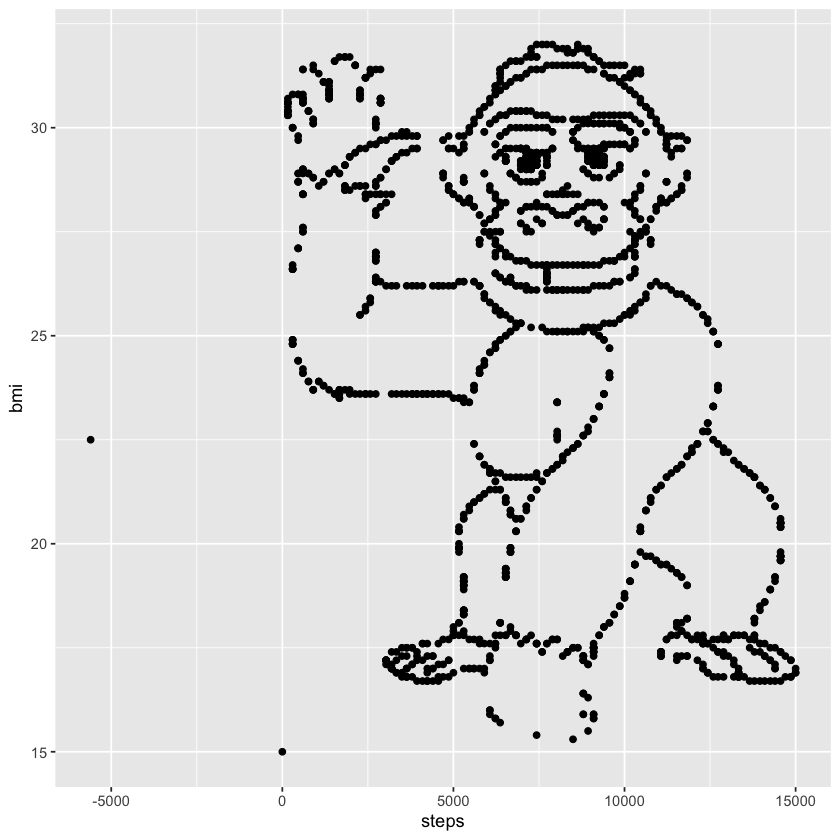

In [78]:
ggplot(CombinedData, aes(steps, bmi)) + geom_point() #just wanted to look at the data but now I feel like I should keep this haha

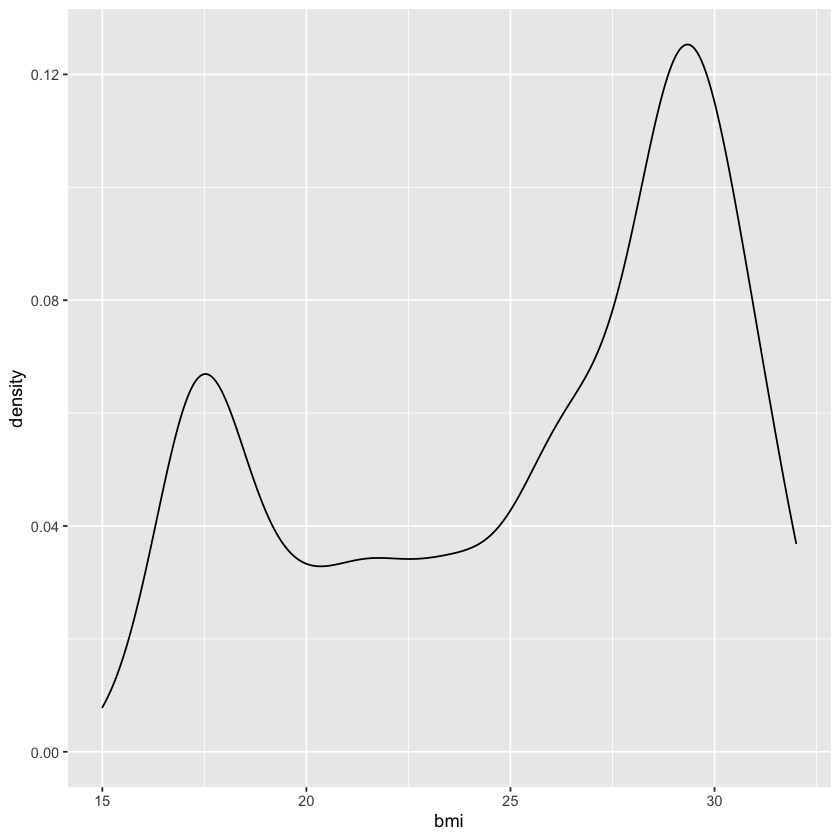

In [10]:
?geom_density()
distribution_bmi <- ggplot(CombinedData, aes(bmi)) + geom_density() #plot the ditribution of bmi with a smooth line instead of a histogram
distribution_bmi

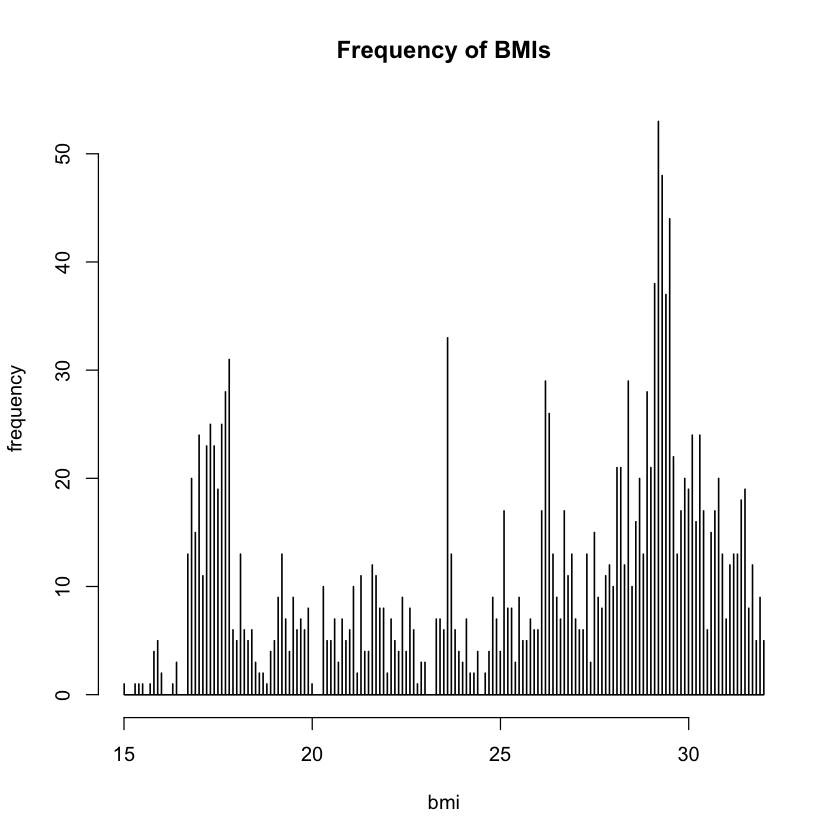

In [19]:
hist(CombinedData$"bmi", breaks = 1786, xlab= "bmi", ylab="frequency", main="Frequency of BMIs") #look at the bmi distribution in a histogram

How would you describe the distribution you found in the previous command?
- In the density plot, it looks like a bimodal distribution (you can see clearly distinct two peaks). In the histogram, it looks similar but there seems to be a third peak in the middle.

Do men and women differ in their BMI? First, run a T test via the `t.test()` command to answer this question **(2 points)**

In [13]:
t.test(bmi~gender, data= CombinedData) # run a T-test to see if bmi differs significantly by gender


	Welch Two Sample t-test

data:  bmi by gender
t = -3.2353, df = 1768.3, p-value = 0.001238
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.2043522 -0.2952488
sample estimates:
  mean in group men mean in group women 
           24.90775            25.65755 


- The p-value is significant, which tells us that there is a significant difference between the mean bmi of men and women.

Can the results of your `t.test()` explain the shape of the distribution of BMI you found in the previous step? Add the `color=gender` argument in the `aes()` part of your previous `ggplot()` call to split the distribution by gender and answer this question **(3 points)**

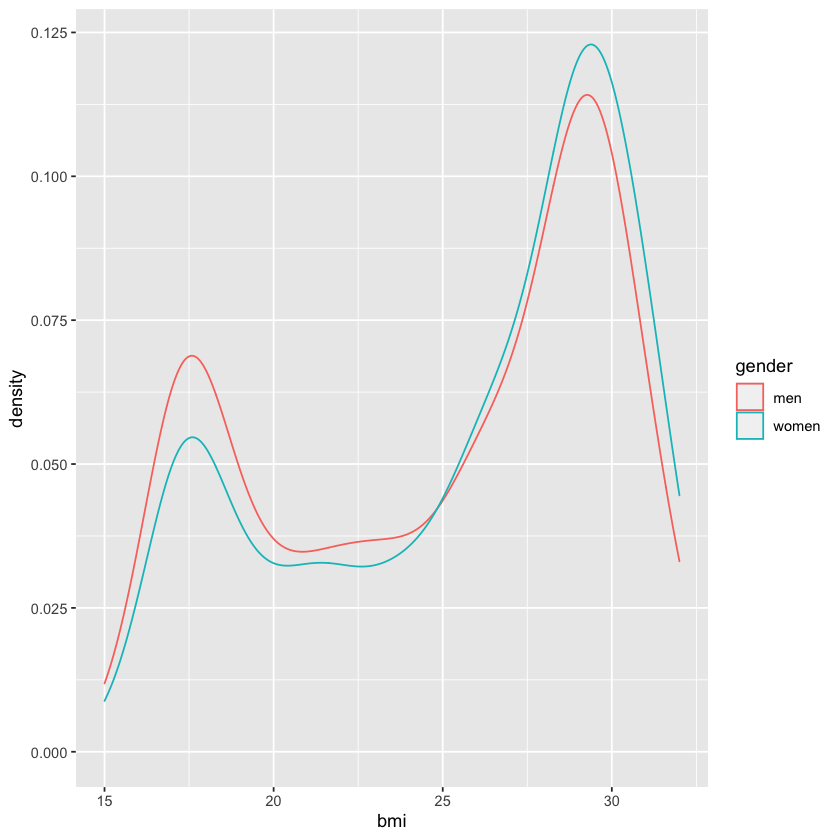

In [15]:
distribution_bmi_gender <- ggplot(CombinedData, aes(bmi, color = gender)) + geom_density() 
distribution_bmi_gender

- The result of the t-test cannot explain the bimodal distribution, because both genders show a bimodal distribution for themselves. What we can see, though, is that in comparison, more women have a higher bmi than men.

### Exploring the STEPS variable

Some errors were made when coding the steps variable. Plot a histogram of the `steps` variable. What is unusual about this data? **(2 points)**

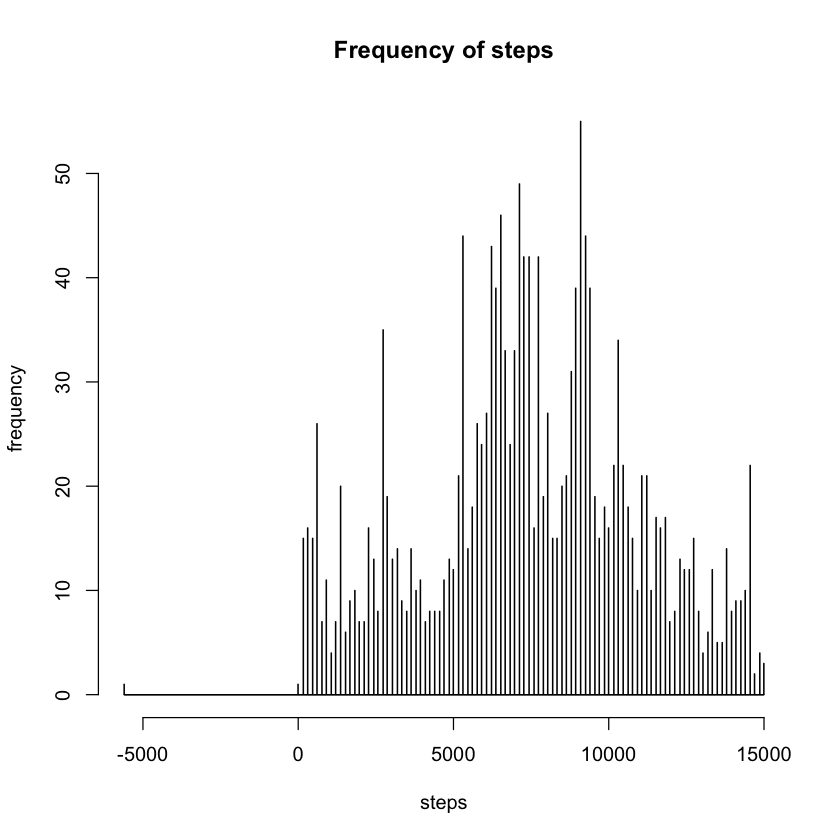

In [22]:
hist(CombinedData$"steps", breaks = 1786, xlab= "steps", ylab="frequency", main="Frequency of steps") #look at the steps in a histogram

- The histogram seems to show that one person has a negative amount of steps (ca. -5500), which is impossible and must be a mistake.

One data point needs to be removed from this dataset. Use the `filter()` command on the `steps` variable to remove the incorrect data point, and save the result to a new data frame **(2 points)**

gender,ID,steps,bmi
<chr>,<int>,<int>,<dbl>
men,1,15000,16.9
men,2,15000,16.9
men,6,14861,16.8
men,7,14861,16.8
men,8,14699,17.3
men,10,14560,20.5
men,11,14560,20.6
men,13,14560,20.5
men,17,14560,20.4


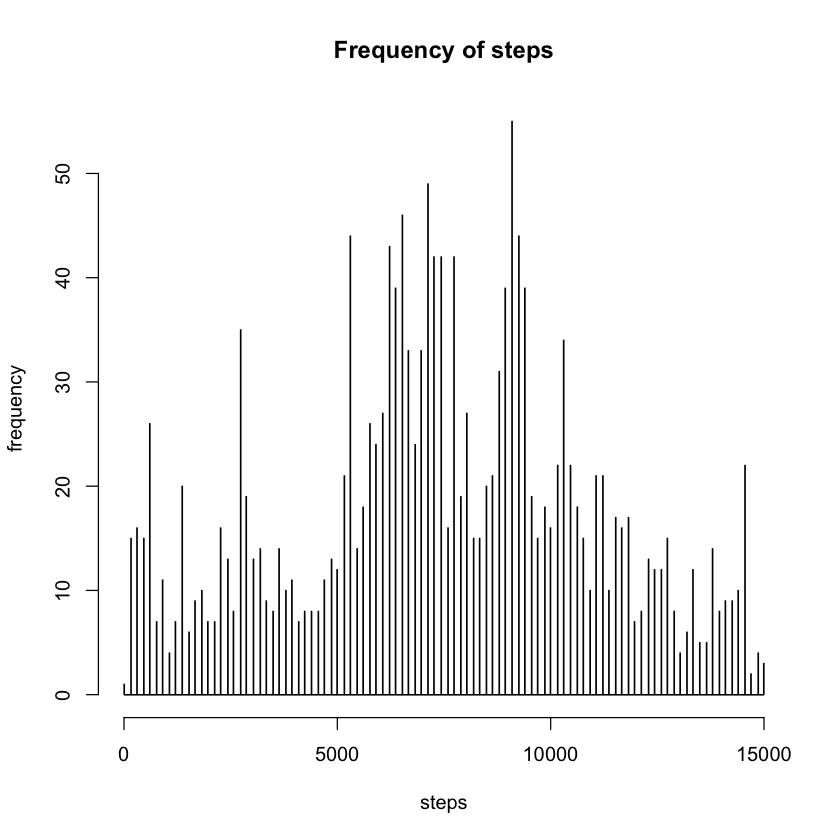

In [36]:
filtered_data <- filter(CombinedData, steps>= 0) # filter out cases below zero
filtered_data
hist(filtered_data$"steps", breaks = 1786, xlab= "steps", ylab="frequency", main="Frequency of steps")

### The relationship between daily steps and BMI

Now that we understand how the individual variables are distributed, and that we have cleaned up the incorrectly coded data point, it's time to understand whether daily steps are related to BMI. 

Please use the `cor.test()` function to answer the following questions **(5 points)**
- *Is there a statistically significant correlation between daily steps and BMI*
- *Does the correlation between daily steps and BMI differ for men and women*

In [43]:
cor_combined <- cor.test(filtered_data$steps, filtered_data$bmi)
cor_combined


	Pearson's product-moment correlation

data:  filtered_data$steps and filtered_data$bmi
t = -12.402, df = 1783, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3239556 -0.2385171
sample estimates:
       cor 
-0.2817949 


In [50]:
by(filtered_data, filtered_data$gender, FUN = function(X) cor(X$steps, X$bmi, method = "spearman"))
# I got this solution from Lotte and it does work, but I need to ask for an explanation because i don't understand it

filtered_data$gender: men
[1] -0.1706271
------------------------------------------------------------ 
filtered_data$gender: women
[1] -0.2344219

In [59]:
cor.test(~ bmi + steps, data=filter(filtered_data, gender == "male"))
cor.test(~ bmi + steps, data=filter(filtered_data, gender == "female"))
# this was my solution idea but I can't figure out how to solve the error

ERROR: Error in cor.test.default(x = numeric(0), y = integer(0)): not enough finite observations


1. There is a significant correlation between bmi and steps, because the p-value is below 0.05.

2. The output shows differing correlations for the two genders, so this answer would be yes. What we can also see that for both genders, the correlation is negative - more steps are correlated with lower bmi. However, we don't know yet if the difference is significant.

Finally, in addition to running a statistical correlation test, what else can you do to better understand the relationship between daily steps and BMI? How would you described this relationship? **(3 points)** 

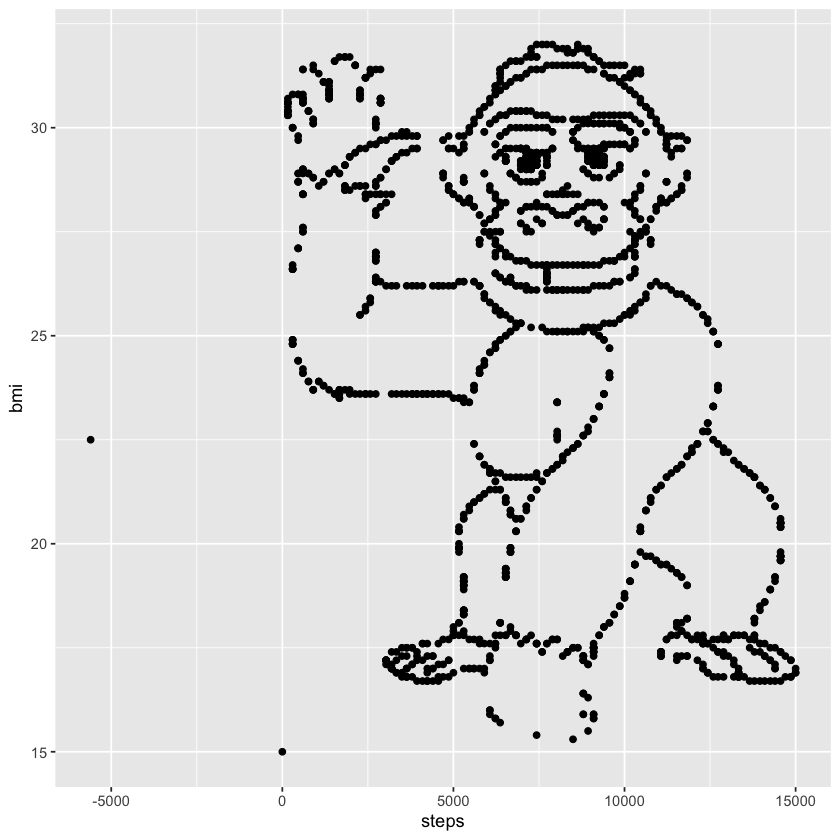

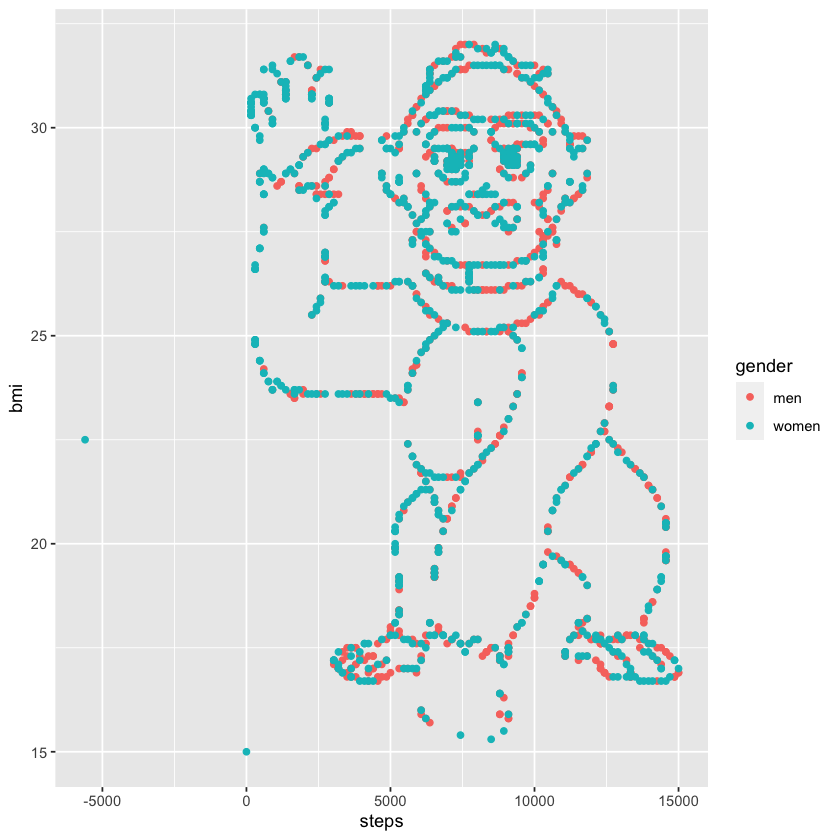

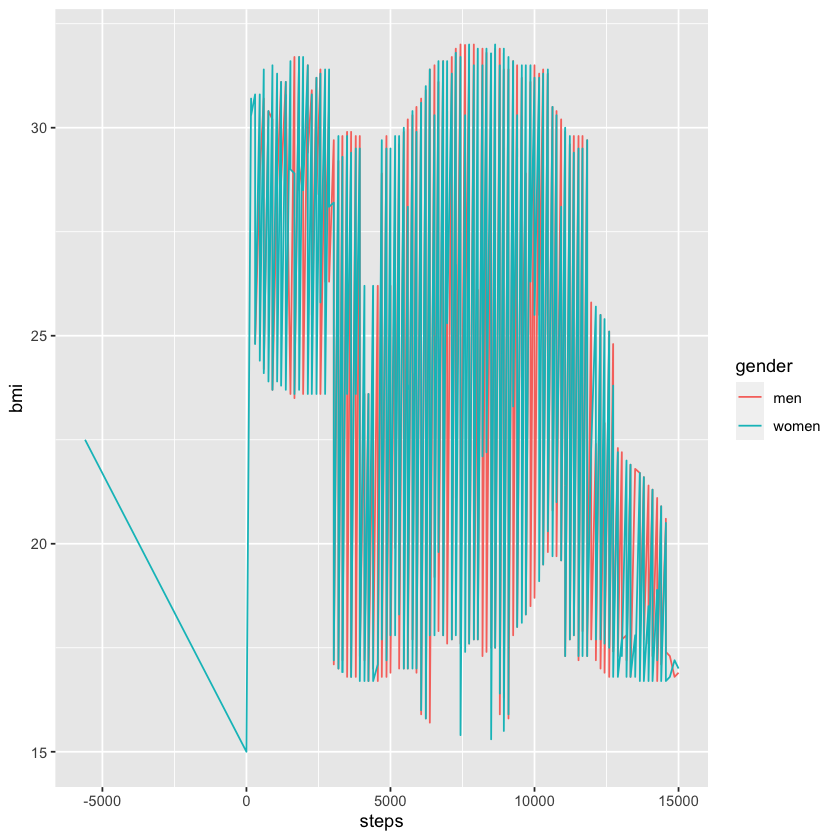

In [81]:
ggplot(CombinedData, aes(steps, bmi)) + geom_point() #plot the relationship between steps and bmi
ggplot(CombinedData, aes(steps, bmi, color=gender)) + geom_point() #see if there is any obvious relationship with gender
ggplot(CombinedData, aes(steps, bmi, color=gender)) + geom_line()

- I'm not sure if this is what is meant by "further explore", but my first idea would be to visualize the data to "explore" it (see above). When I plot the relationship between steps and bmi and add color to differentiate between the genders, I get the pictures above - which makes me think that there is zero correlation between daily steps and bmi. Now, I'm confused because if I were a researcher, the first thing I'd do would be to plot the data like I did above. Then I already wouldn't expect a negative correlation (from "eyesight"), but the correlation i calculated seems to be negative for both genders. This seems contradicting.